In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
unpopular = pd.read_csv("Resources/unpopulardata.csv")
popular = pd.read_csv("Resources/2019data_cleaned.csv")

In [3]:
unpopular['popularity'] = 0
popular['popularity'] = 1
unpopular.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,popularity
0,0,0.170000,https://api.spotify.com/v1/audio-analysis/5hTp...,0.941,209640,0.335,5hTpBe8h35rJ67eAWHQsJx,0.000000,5,0.2620,-10.179,0,0.5050,120.041,4,https://api.spotify.com/v1/tracks/5hTpBe8h35rJ...,audio_features,spotify:track:5hTpBe8h35rJ67eAWHQsJx,0.707,0
1,1,0.189000,https://api.spotify.com/v1/audio-analysis/75rn...,0.740,207733,0.974,75rnLkvIeq8RZ8xjcFIvSG,0.000000,1,0.0849,-3.585,1,0.0903,120.041,4,https://api.spotify.com/v1/tracks/75rnLkvIeq8R...,audio_features,spotify:track:75rnLkvIeq8RZ8xjcFIvSG,0.766,0
2,2,0.129000,https://api.spotify.com/v1/audio-analysis/3gzv...,0.795,194000,0.557,3gzvOfEsblYOVK3xDXodCP,0.000000,1,0.1130,-6.653,1,0.0426,119.942,4,https://api.spotify.com/v1/tracks/3gzvOfEsblYO...,audio_features,spotify:track:3gzvOfEsblYOVK3xDXodCP,0.403,0
3,3,0.000323,https://api.spotify.com/v1/audio-analysis/3ilt...,0.637,169573,0.509,3ilt7lMNflb49pEDpcZPAa,0.000000,1,0.0938,-5.926,1,0.0346,111.805,4,https://api.spotify.com/v1/tracks/3ilt7lMNflb4...,audio_features,spotify:track:3ilt7lMNflb49pEDpcZPAa,0.306,0
4,4,0.551000,https://api.spotify.com/v1/audio-analysis/18AX...,0.446,336453,0.239,18AXbzPzBS8Y3AkgSxzJPb,0.000004,0,0.0697,-13.945,1,0.0316,189.507,4,https://api.spotify.com/v1/tracks/18AXbzPzBS8Y...,audio_features,spotify:track:18AXbzPzBS8Y3AkgSxzJPb,0.298,0


In [4]:
df = pd.concat([unpopular, popular], ignore_index=True,sort=False)

In [5]:
df = df[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
df = df.dropna(how = 'any')
df.tail()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
751,1,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,0.317,176.089,4,0.429
752,1,0.4270,0.679,179973,0.443,0.000000,10,0.1060,-8.528,0,0.153,104.049,4,0.363
753,1,0.0794,0.816,136366,0.582,0.000006,8,0.0916,-4.141,1,0.341,160.004,4,0.542
754,1,0.3630,0.630,174333,0.671,0.000000,6,0.1130,-6.659,0,0.256,89.921,4,0.333
755,1,0.5820,0.819,268893,0.458,0.173000,4,0.1280,-10.223,0,0.167,122.981,4,0.232


In [6]:
X = df[['acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','time_signature','valence']]
y = df["popularity"].values#.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (756, 13) (756,)


In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train) 
X_test_scaled = X_scaler.transform(X_test)

### Decision Tree Model

In [9]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()

In [10]:
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.6190476190476191

In [11]:
predictions = clf.predict(X_test_scaled)

In [12]:
test_result_df = pd.DataFrame({"Predicted": y_test, "Actual": predictions})[["Predicted", "Actual"]]
test_result_df.head()

,Predicted,Actual
0,1,1
1,0,0
2,1,0
3,1,1
4,1,0


In [13]:
feature_names = X.columns
sorted(zip(clf.feature_importances_, feature_names), reverse=True)


[(0.1661318830302002, 'tempo'),
 (0.10754825043810914, 'duration_ms'),
 (0.10553015701827645, 'instrumentalness'),
 (0.09469333108183557, 'danceability'),
 (0.09222526523487697, 'speechiness'),
 (0.08254606538555674, 'liveness'),
 (0.07899000371239369, 'valence'),
 (0.07754578849874424, 'acousticness'),
 (0.06807201028722872, 'energy'),
 (0.06353545605333838, 'loudness'),
 (0.03804112323247306, 'key'),
 (0.018131713026920737, 'mode'),
 (0.00700895300004615, 'time_signature')]

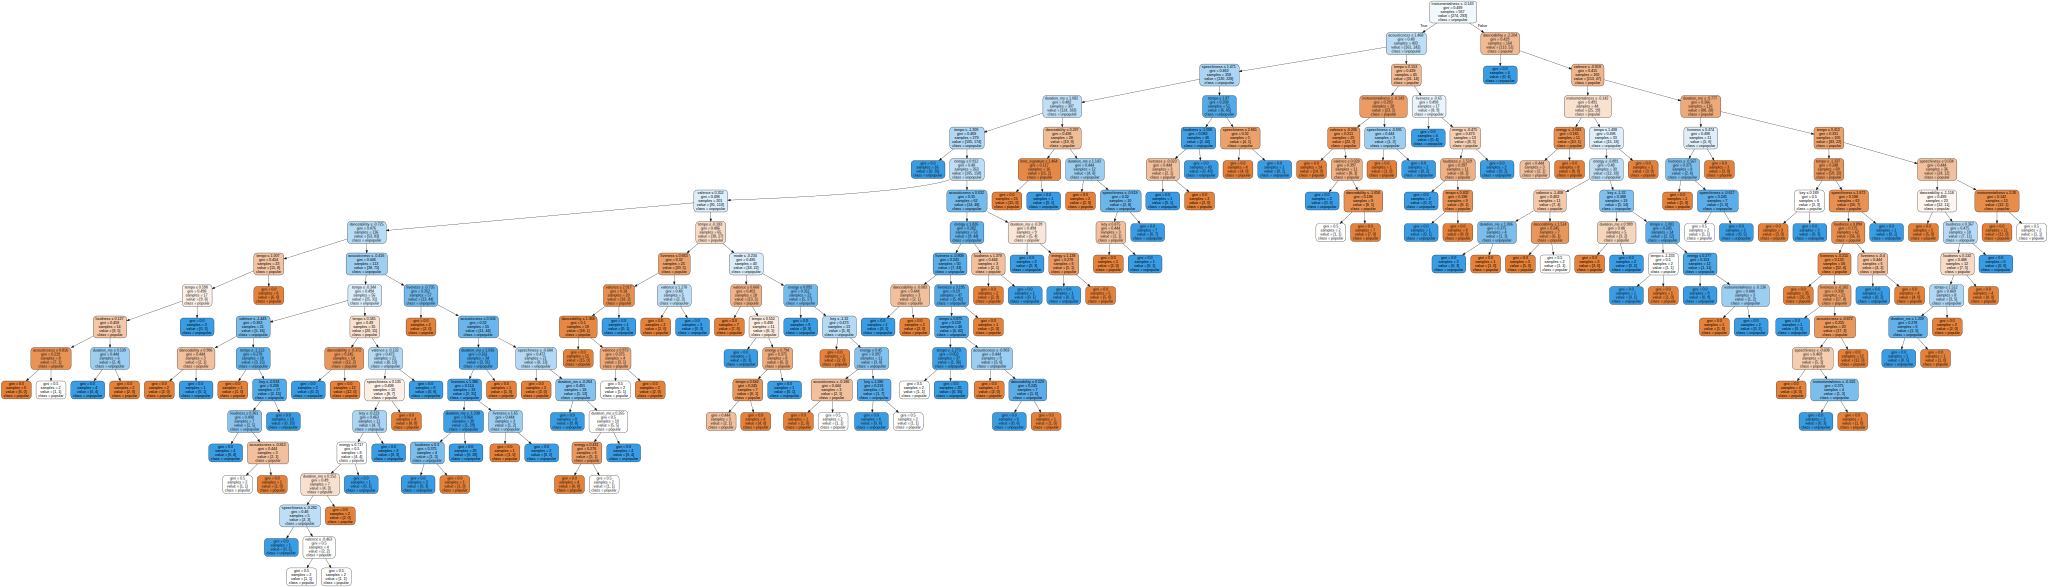

In [14]:
import graphviz
dot_data = tree.export_graphviz( clf, out_file=None, feature_names=feature_names, class_names=["popular","unpopular"], filled=True, rounded=True, special_characters=True)

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)

graph = graphviz.Source(dot_data) 
graph


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=200) 
rf = rf.fit(X_train_scaled, y_train) 
rf.score(X_test_scaled, y_test)
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)


In [ ]:
rf.score(X_test_scaled, y_test)

### Neural Network

In [ ]:
from numpy.random import seed 
seed(42)

In [ ]:
from keras.utils import to_categorical
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential 
model_neural = Sequential()


In [ ]:
from tensorflow.keras.layers import Dense 
number_inputs = 13 
number_hidden_nodes = 100 
model_neural.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))

for i in range(11):
    model_neural.add(Dense(units=number_hidden_nodes, activation='relu')) 

number_classes = 2 
model_neural.add(Dense(units=number_classes, activation='softmax'))
model_neural.summary()


In [ ]:
model_neural.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model_neural.fit( X_train_scaled, y_train_cate, epochs=20, shuffle=True, verbose=2 )
model_loss, model_accuracy = model_neural.evaluate( X_test_scaled, y_test_cate, verbose=2) 
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


### K Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = [] 
test_scores = []
for k in range(1, 20, 2):
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train_scaled, y_train)  
      train_score = knn.score(X_train_scaled, y_train)
      test_score = knn.score(X_test_scaled, y_test) 
      train_scores.append(train_score) 
      test_scores.append(test_score)
      print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 0.974/0.598
k: 3, Train/Test Score: 0.765/0.571
k: 5, Train/Test Score: 0.727/0.566
k: 7, Train/Test Score: 0.711/0.582
k: 9, Train/Test Score: 0.683/0.582
k: 11, Train/Test Score: 0.661/0.577
k: 13, Train/Test Score: 0.633/0.614
k: 15, Train/Test Score: 0.644/0.619
k: 17, Train/Test Score: 0.640/0.614
k: 19, Train/Test Score: 0.624/0.619


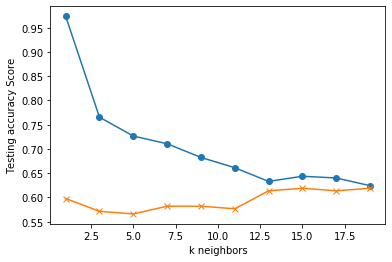

In [16]:
plt.plot(range(1, 20, 2), train_scores, marker='o') 
plt.plot(range(1, 20, 2), test_scores, marker="x") 
plt.xlabel("k neighbors") 
plt.ylabel("Testing accuracy Score")
plt.show()


In [17]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train) 
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))


k=13 Test Acc: 0.577


In [18]:
plt.savefig("K_Neighbors_model_popularity.png")

<Figure size 432x288 with 0 Axes>

In [19]:
from sklearn.metrics import confusion_matrix 
knn_predictions = knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, knn_predictions) 
cm

array([[56, 51],
       [29, 53]], dtype=int64)

### Gaussian Naive Bayes

In [20]:
#from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb.score(X_test_scaled, y_test)

0.5185185185185185

In [21]:
gnb_predictions = gnb.predict(X_test_scaled)
cm = confusion_matrix(y_test, gnb_predictions) 
cm


array([[24, 83],
       [ 8, 74]], dtype=int64)

### Support Vector Machine

In [22]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear') 
model_svc.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report
predictions = model_svc.predict(X_test_scaled)
print(classification_report(y_test, predictions, target_names=["popular", "unpopular"]))


              precision    recall  f1-score   support

     popular       0.75      0.44      0.55       107
   unpopular       0.52      0.80      0.63        82

    accuracy                           0.60       189
   macro avg       0.63      0.62      0.59       189
weighted avg       0.65      0.60      0.59       189



In [23]:
svm_predictions = model_svc.predict(X_test_scaled) 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, svm_predictions) 
cm

array([[47, 60],
       [16, 66]], dtype=int64)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")


In [ ]:
from sklearn.linear_model import LogisticRegressionCV 
classifier = LogisticRegressionCV(multi_class="multinomial")
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

In [24]:
from sklearn.linear_model import RidgeClassifierCV
classifier = RidgeClassifierCV()
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6102292768959435
Testing Data Score: 0.6137566137566137


In [25]:
classifier_predictions = classifier.predict(X_test_scaled) 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, classifier_predictions) 
cm

array([[50, 57],
       [16, 66]], dtype=int64)